<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.
</font>

In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('../eda-telecomm_group_project-lab/datasets/metadata.csv')
df.head(10)

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690
5,5050101532B23,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:36,Phone,-33.884171,151.202350
6,5050101536E5E,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:40,Phone,-33.884171,151.202350
7,5050101531F08,REDFERN TE,7cb96eadd3ff95e25406d24794027c443c0661c5,4/2/14 19:18,Phone,-33.892933,151.202296
8,505010153111F,HAYMARKET #,de40c5c1f9249f95f7fb216931db58747afef74f,4/3/14 14:35,Phone,-33.880329,151.205690
9,505010153111F,HAYMARKET #,66f32c1163d0e597983b65c51f5a477070ad3785,4/3/14 14:36,Phone,-33.880329,151.205690


In [53]:
df['Comm Type'].value_counts()

Internet    9102
Phone        717
SMS          657
Name: Comm Type, dtype: int64

In [54]:
df['Cell Tower Location'].value_counts()

BALGOWLAH HAYES ST                          4301
CHIPPENDALE                                 1084
SUNDERLAND ST                                723
REDFERN TE                                   712
HAYMARKET #                                  563
BRICKWORKS                                   501
HARBORD 22 WAINE ST                          465
FAIRLIGHT 137 SYDNEY RD                      454
MANLY #                                      231
NEW TOWN                                     197
CHINATOWN                                    161
BEECHWORTH                                   112
BALGOWLAH VILLAGE SHOPPING CENTRE IBC        106
MANLY SOUTH STEYNE                            92
BROADWAY OTC                                  85
MASCOT INTERNATIONAL AIRPORT TERMINAL T1      65
71 MACQUARIE ST                               49
SURRY HILLS 418A ELIZABETH ST                 45
MANLY NTH STEYNE                              40
MASCOT M5 MOTORWAY EMERGENCY STAIRS           33
BALGOWLAH TE        

In [55]:
# most viewed cell towers
# comm type to each cell tower
# geo location from 
# who is getting hit up the most
# time of activity, who is being contacted the most. Convert time into some period. 
# plot location of person over time 
# find out where person lives, where they are most during daytime

In [56]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.reverse('-33.892933, 151.202296')
print location.address

Redfern Telstra Exchange, 103-109, George Street, Redfern, Sydney, NSW, 2016, Australia


In [72]:
df['LatLong'] = zip(df['Latitude'] , df['Longitude'])
df2 = df[['LatLong', 'Cell Tower Location']]
df2

,LatLong,Cell Tower Location
0,"(-33.89293336, 151.2022962)",REDFERN TE
1,"(-33.89293336, 151.2022962)",REDFERN TE
2,"(-33.88032891, 151.2056904)",HAYMARKET #
3,"(-33.88032891, 151.2056904)",HAYMARKET #
4,"(-33.88032891, 151.2056904)",HAYMARKET #
5,"(-33.88417103, 151.20235)",CHIPPENDALE
6,"(-33.88417103, 151.20235)",CHIPPENDALE
7,"(-33.89293336, 151.2022962)",REDFERN TE
8,"(-33.88032891, 151.2056904)",HAYMARKET #
9,"(-33.88032891, 151.2056904)",HAYMARKET #


In [ ]:
#df['location'] = df['combined'].apply(lambda x: geolocator.reverse(x))

In [20]:
x = df['Latitude']
y = df['Longitude']
df.plot(x=x, y=y, kind='scatter')

KeyError: '[-33.89293336 -33.89293336 -33.88032891 ..., -33.89293336 -33.89293336\n -33.89293336] not in index'

In [18]:
df['Longitude'].dtypes

dtype('float64')

In [73]:
df

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,LatLong
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,"(-33.89293336, 151.2022962)"
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,"(-33.89293336, 151.2022962)"
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,"(-33.88032891, 151.2056904)"
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,"(-33.88032891, 151.2056904)"
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,"(-33.88032891, 151.2056904)"
5,5050101532B23,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:36,Phone,-33.884171,151.202350,"(-33.88417103, 151.20235)"
6,5050101536E5E,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:40,Phone,-33.884171,151.202350,"(-33.88417103, 151.20235)"
7,5050101531F08,REDFERN TE,7cb96eadd3ff95e25406d24794027c443c0661c5,4/2/14 19:18,Phone,-33.892933,151.202296,"(-33.89293336, 151.2022962)"
8,505010153111F,HAYMARKET #,de40c5c1f9249f95f7fb216931db58747afef74f,4/3/14 14:35,Phone,-33.880329,151.205690,"(-33.88032891, 151.2056904)"
9,505010153111F,HAYMARKET #,66f32c1163d0e597983b65c51f5a477070ad3785,4/3/14 14:36,Phone,-33.880329,151.205690,"(-33.88032891, 151.2056904)"


In [78]:
from datetime import datetime

datetime_object = datetime.['Comm Timedate String']

AttributeError: type object 'datetime.datetime' has no attribute 'df'

In [118]:
dt = parser.parse('4/8/14')
dt.weekday()

1

In [121]:
from dateutil import parser
df['Comm Timedate'] = df['Comm Timedate String'].apply(lambda x: parser.parse(x))
df['hour'] = df['Comm Timedate'].apply(lambda x: x.hour)
df['day of week'] = df['Comm Timedate'].apply(lambda x: x.weekday())

In [131]:
weekday = [1,2,3,4,5]

df_weekday = df[df['day of week'] in weekday]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [106]:
df['hour'] = df['Comm Timedate'].apply(lambda x: x.hour)

In [ ]:
# Showa


#1. Breakdown of usage
#2. Chart of most contacted person 
#3. By Time of day, showing type of activity (SMS, Phone, Internet)



In [213]:
df3 = df[['hour', 'Cell Tower Location', 'Comm Type']]
df4 = df3.groupby(['hour', 'Cell Tower Location'])['Cell Tower Location'].agg('count')

In [218]:
print df4

hour  Cell Tower Location                 
0     BALGOWLAH HAYES ST                       84
      CHIPPENDALE                               1
      CREMORNE #                                1
      FAIRLIGHT 137 SYDNEY RD                   1
      HARBORD 22 WAINE ST                       1
      HAYMARKET #                               2
      REDFERN TE                                5
1     BALGOWLAH HAYES ST                       87
      CHIPPENDALE                               2
      CREMORNE #                                1
      FAIRLIGHT 137 SYDNEY RD                   5
      HARBORD 22 WAINE ST                       9
      MANLY #                                   2
      NORTH SYDNEY 54 MCLAREN                   1
      REDFERN TE                                4
2     BALGOWLAH HAYES ST                      124
      CHIPPENDALE                               1
      FAIRLIGHT 137 SYDNEY RD                   1
      HARBORD 22 WAINE ST                       8
      R

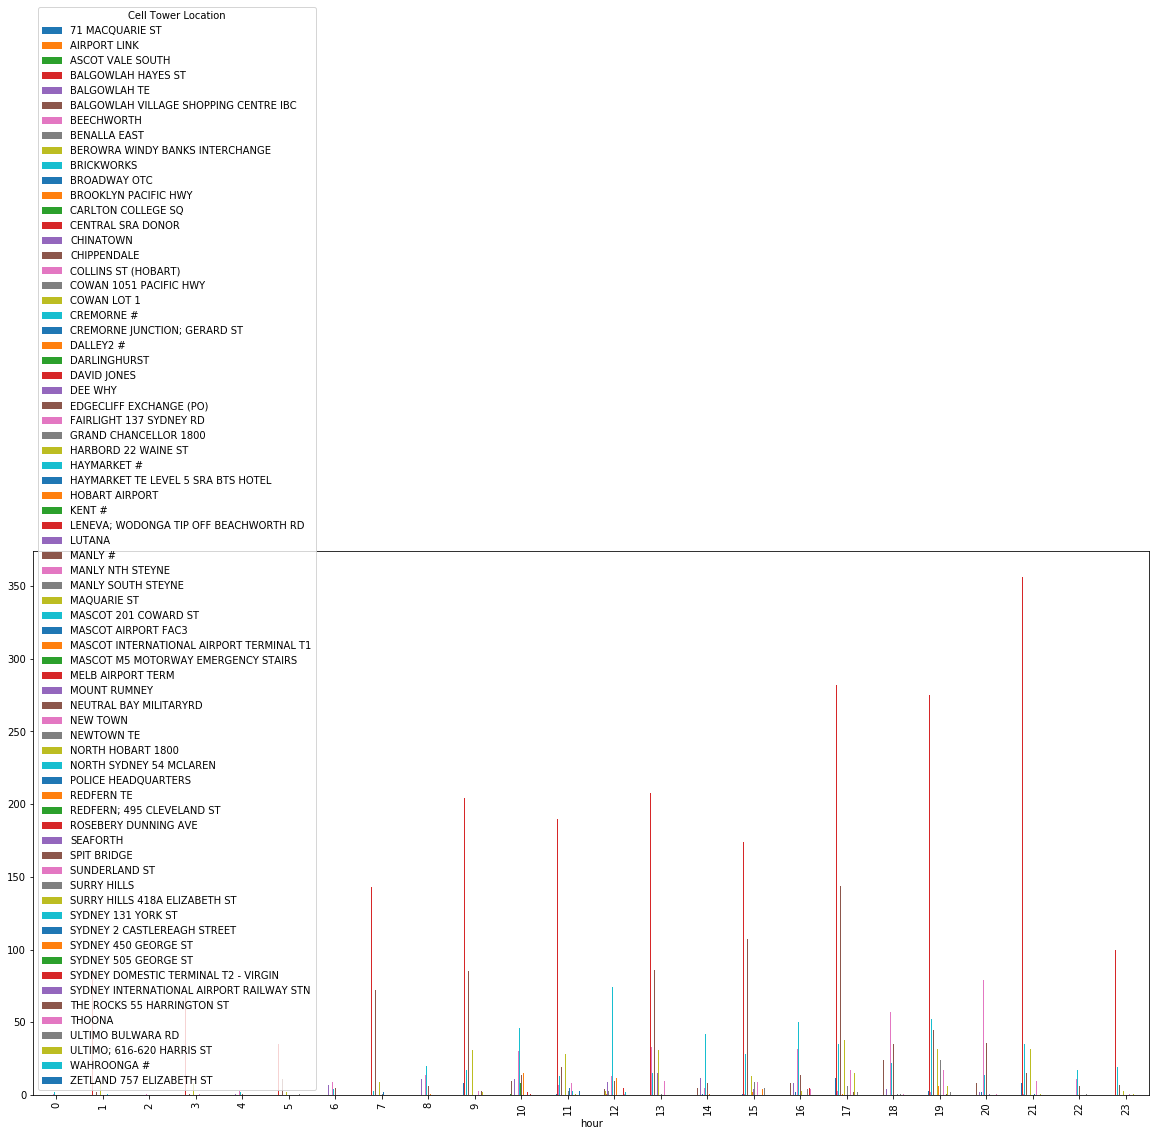

In [188]:
import matplotlib

%matplotlib inline


df4.plot(kind='bar', figsize=(20,10))